In [1]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does 
# dataset have?

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel('flight_price.xlsx')
print('2-diamensions:',df.shape)
print('no of rows : ',df.shape[0])
print('no of columns : ',df.shape[1])

2-diamensions: (10683, 11)
no of rows :  10683
no of columns :  11


In [2]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

<AxesSubplot: xlabel='Destination', ylabel='Count'>

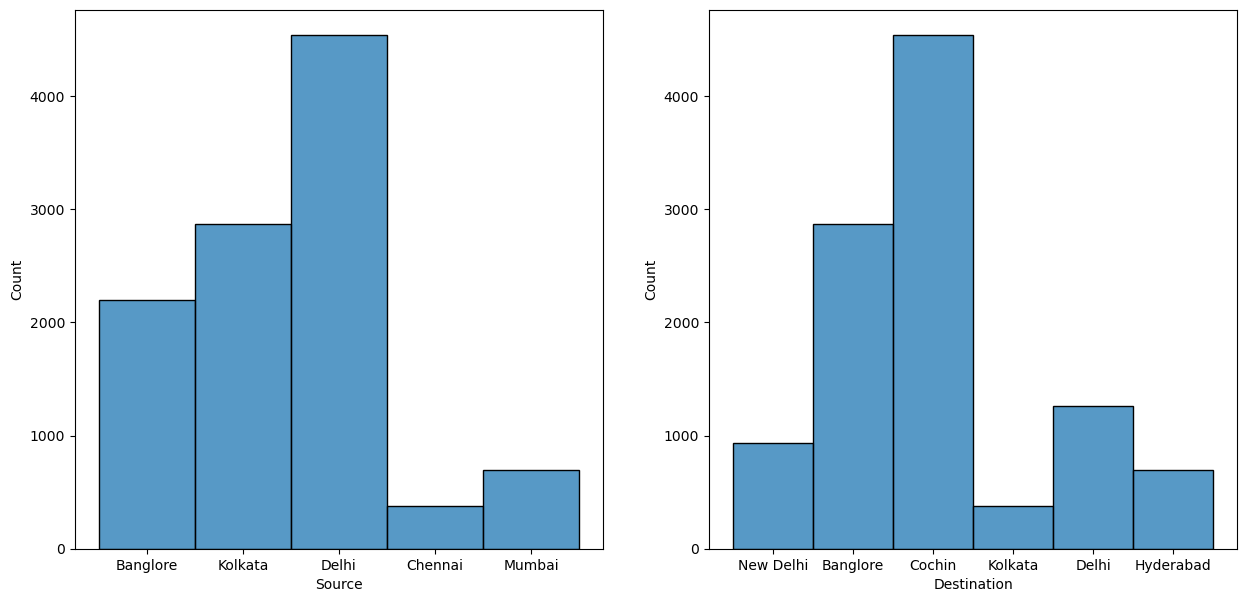

In [4]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.

import seaborn as sns
import matplotlib.pyplot as plt

fig,axis=plt.subplots(1,2,figsize=(15,7)) 
plt.subplot(121) 
sns.histplot(data=df,x='Source')
plt.subplot(122)
sns.histplot(data=df,x='Destination')

 maximum flight go from Delhi
 maximum flight come in cochin

In [5]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

print('range of price :',(df['Price'].min(),df['Price'].max()))
print('maximum price :',df['Price'].max())
print('minimum price :',df['Price'].min())


range of price : (1759, 79512)
maximum price : 79512
minimum price : 1759


<AxesSubplot: xlabel='Price'>

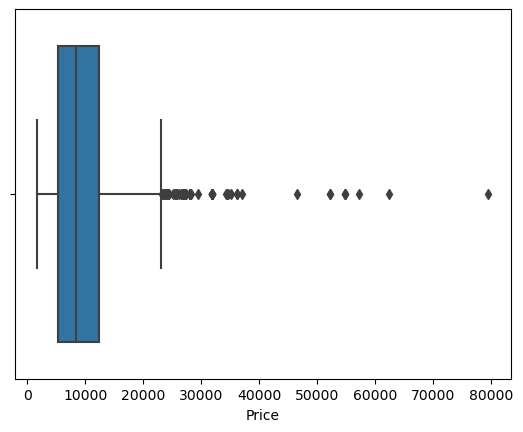

In [6]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of 
# different airlines.

sns.boxplot(data=df,x='Price')

#  25% flights price less than 5500
#  next 25% flights price between 5500 to 8500
# next 25% flights price between 8500 to 12000
# other flights price between 12000 to 23000
# maximum price of flight is 79512
# very few flight price above 23000

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64


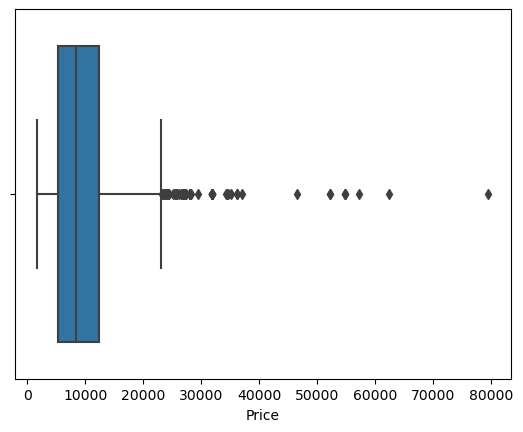

In [7]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and 
# describe how they may impact your analysis.

sns.boxplot(data=df,x='Price')
print(df['Price'].describe())

In [8]:
df['WOoutlier_Price']=df['Price'][df['Price']<25000]
df['WOoutlier_Price'].describe()

count    10601.000000
mean      8914.548533
std       4097.662934
min       1759.000000
25%       5228.000000
50%       8366.000000
75%      12327.000000
max      24528.000000
Name: WOoutlier_Price, dtype: float64

### outlier affect mean and std of price

In [9]:
# Q6.You are working for a travel agency, and your boss has asked you to analyze the Flight Price 
# dataset to identify the peak travel season. What features would you analyze to identify the peak
#  season, and how would you present your findings to your boss?

df.head(2)
# i am analye Date_of_Journey and source and present by histgram

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,WOoutlier_Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7662.0


In [10]:
df['date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,WOoutlier_Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7662.0,1,5,2019


In [11]:
df['month'].unique()

array([3, 5, 6, 4])

<AxesSubplot: xlabel='month', ylabel='Count'>

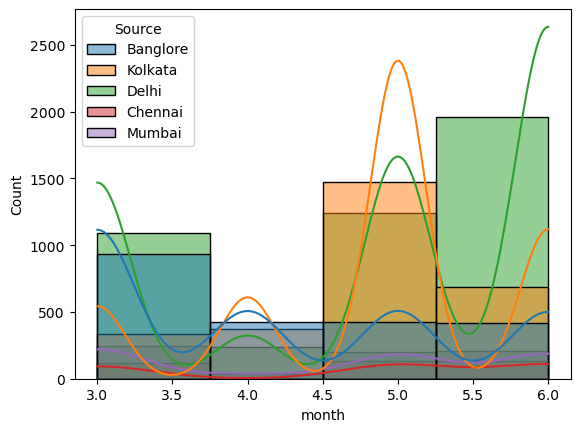

In [12]:
sns.histplot(data=df,x='month',bins=4,kde=True,hue='Source')

### peak travel season is may in kolkata
### peak travel season in may and june in Delhi

**Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze  to identify these trends, and what visualizations would you use to present your findings to  your team?**

Features to Analyze:

Date of Journey: Analyze prices over different days, months, and years to identify seasonal and long-term trends.

Airline: Compare flight prices across different airlines to observe variations in pricing strategies.

Source and Destination: Investigate price differences based on various source and destination combinations.

Duration: Analyze if flight duration impacts prices.

Visualizations:

Time Series Line Chart: Display average prices over time to show seasonal trends and fluctuations.

Bar Chart: Compare average prices for different airlines, source-destination pairs, and numbers of stops.

Box Plot: Visualize the distribution of prices for airlines and source-destination pairs to identify outliers and ranges.

Scatter Plot: Show the relationship between flight duration and prices.

Heatmap: Display average prices across days of the week and months to identify patterns.


In [13]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
# identify these factors, and how would you present your findings to the management team?
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,WOoutlier_Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,7662.0,1,5,2019


In [14]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df[df['Duration_min'].isnull()]=0
df['Duration_min']=df['Duration_min'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)

In [15]:
df['Duration']=df['Duration_hour']*60+df['Duration_min']
df['Duration'].unique()

array([ 170,  445,    0,  325,  285,  145,  930, 1265, 1530,  470,  795,
        155,  135,  730, 1595,  270, 1355, 1235,  310,  920,  175,  800,
        910,  345,  355,  805,  330,  625,  315,  150,  375,  715,  665,
        510, 1325,  165,  965, 1195,  195, 1520,  975,  905,  390, 1505,
        745, 1640,  615,  630,   90,   85, 1590,  440,  810, 1145,  890,
        160, 1330,  575, 1280, 1125,  740,  555, 1050,  995,  735,  450,
        535,  430,  870, 1820,  765,  610,  925,  845, 1215, 1390, 1090,
        140, 1015,  190, 1430, 1300, 1275,  650,  495,  515,  710, 1655,
        505, 1255,  290,  490, 1465, 1415, 1545, 1570, 1730, 1515,  560,
        550,  185,  690,  570, 1055,  305, 1550, 1105, 1450,  295, 1535,
        380, 1120, 1165, 1760,  545,  645,  700, 1375, 2245, 1540,  835,
        520, 1410,  755, 1455,   80,  675,  875,  775,  460,  705, 1495,
       1025, 1795, 1335,  880,  435, 1210, 1245, 1470, 1225,  335,  885,
        340,  245,  955,  465, 1700,  260,  220,  5

Text(0, 0.5, 'Price')

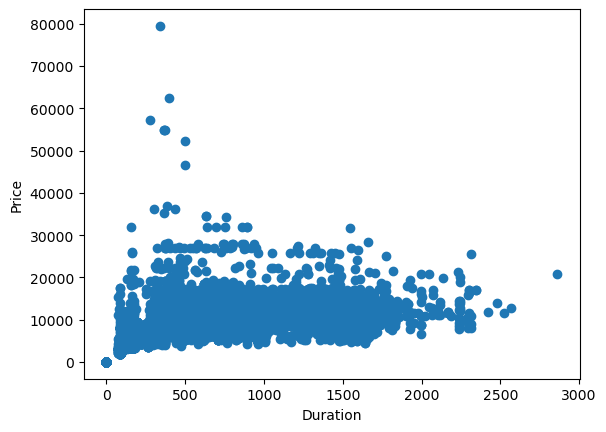

In [16]:
plt.scatter(x=df['Duration'],y=df['Price'])
plt.xlabel('Duration')
plt.ylabel('Price')

In [17]:
category = pd.DataFrame(df.groupby('Airline')['Price'].mean())        #Dataframe of apps on the basis of category
category.rename(columns = {'Airline':'Count'},inplace=True)
category

,Price
Airline,
0,0.000000
Air Asia,5539.323529
Air India,9556.909761
GoAir,5894.090395
IndiGo,5634.569358
Jet Airways,11824.929611
Jet Airways Business,59584.600000
Multiple carriers,10916.874074
Multiple carriers Premium economy,11575.545455


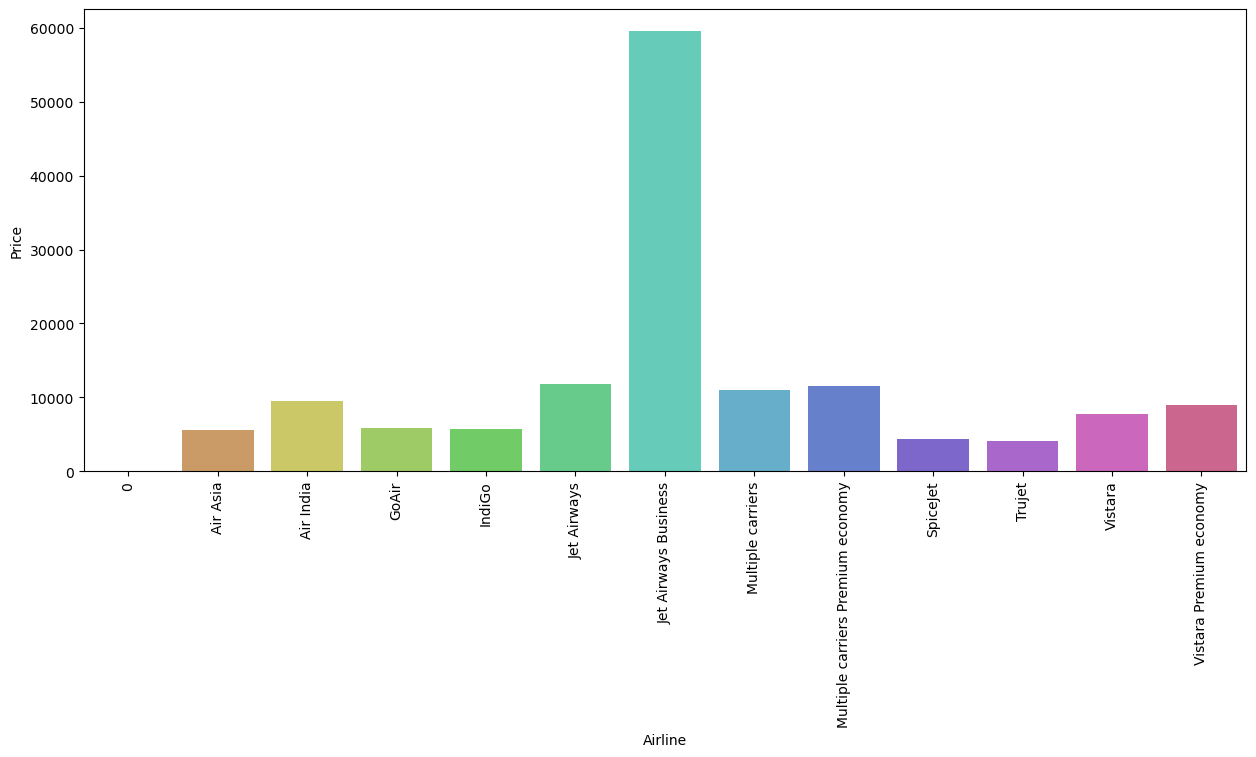

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:], y ='Price',data = category,palette='hls')
plt.xticks(rotation=90)
plt.show()

jet airways business flight price are very high
jet airway and multiple carrires flight price are very high.
when increase flight duration, flight price not increase very much.

# Google Playstore:

In [19]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
# the dataset have?

df2=pd.read_csv('play store.csv')
print('dimensions :',df.shape)
print('number of rows :',df.shape[0])
print('number of columns :',df.shape[1])


dimensions : (10683, 17)
number of rows : 10683
number of columns : 17


In [20]:
df2.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


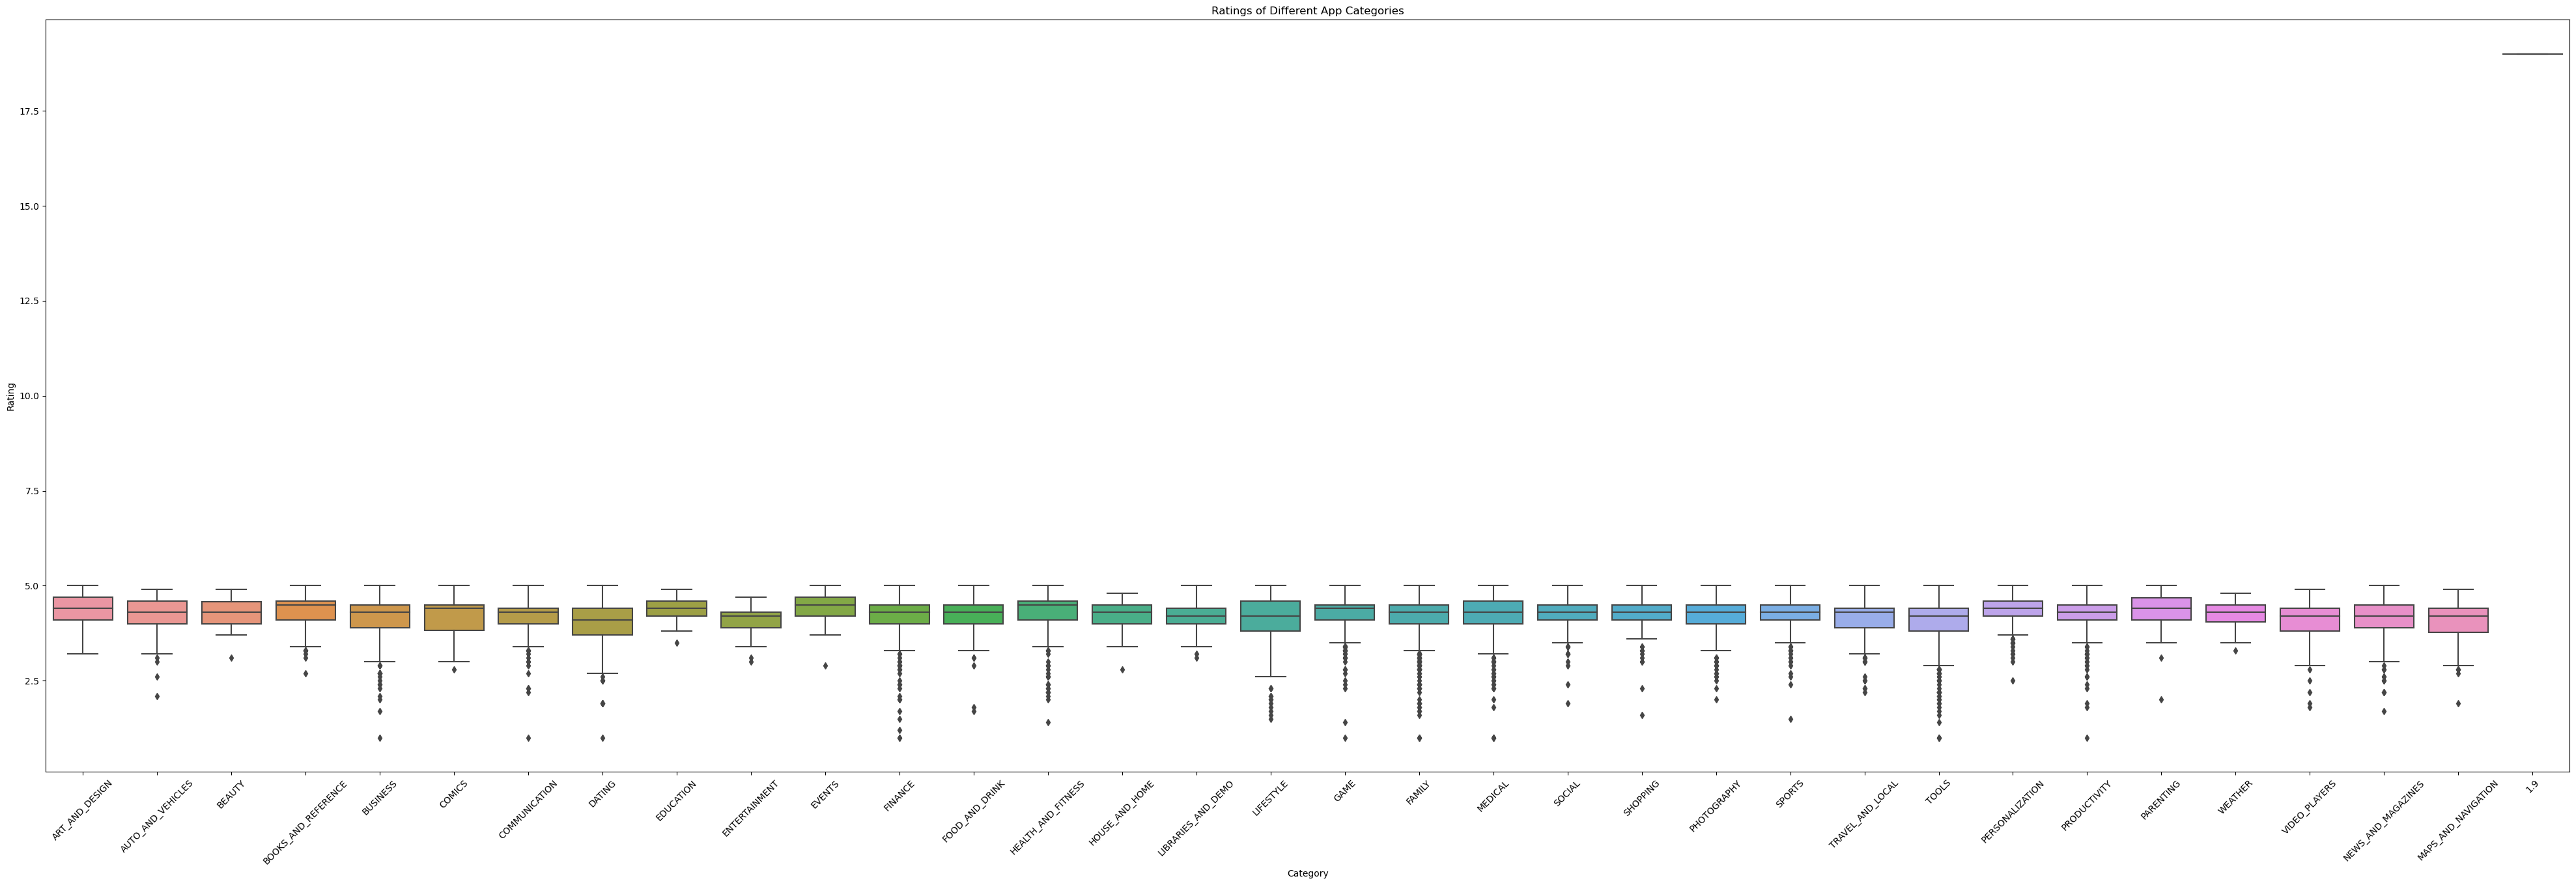

In [21]:
# Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of 
# different app categories.

plt.figure(figsize=(50, 15))
sns.boxplot(x='Category', y='Rating', data=df2)
plt.title('Ratings of Different App Categories')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()
# category not affect rating of app

In [22]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how
#  they may impact your analysis.

df2.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Missing data can significantly impact your analysis by introducing bias, reducing sample size, and leading to inaccurate or invalid conclusions. It can distort relationships, affect parameter estimates, and mislead decision-making. Handling missing data is crucial for maintaining the integrity of your analysis, involving techniques like imputation, understanding the mechanism of missingness, using robust methods, and transparent reporting.

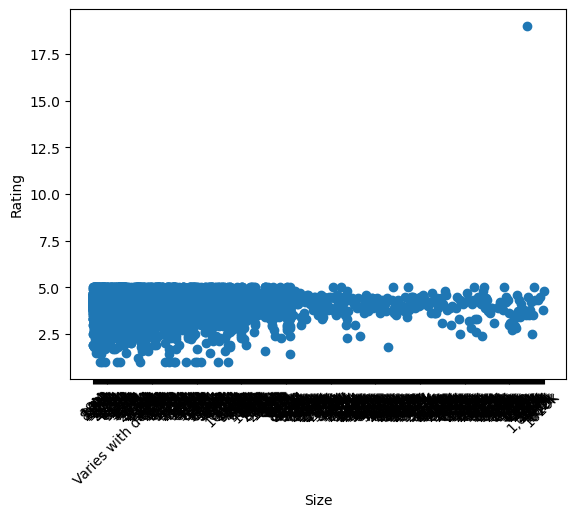

In [23]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
# the relationship.

plt.scatter(df2['Size'],df2["Rating"])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

size of app not affect rating of app

In [24]:
df2[df2['Price']=='Everyone']

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [25]:
df2.drop(index=10472,inplace=True)

In [26]:
df2['Last Updated']=pd.to_datetime(df2['Last Updated'])
df2['Day']=df2['Last Updated'].dt.day
df2['Month']=df2['Last Updated'].dt.month
df2['Year']=df2['Last Updated'].dt.year

In [33]:
df2['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [34]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

# first convert prices object to float value

chars_to_remove=[',','+','$']
col_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in col_to_clean:
        df2[cols]=df2[cols].str.replace(item,'')
df2['Price']=df2['Price'].astype(float)

/tmp/ipykernel_84/2858704333.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2[cols]=df2[cols].str.replace(item,'')


In [35]:
category = pd.DataFrame(df2.groupby('Category')['Price'].mean())       
category.rename(columns = {'Category':'avg_price'},inplace=True)
category

,Price
Category,
ART_AND_DESIGN,0.091846
AUTO_AND_VEHICLES,0.158471
BEAUTY,0.000000
BOOKS_AND_REFERENCE,0.518485
BUSINESS,0.402761
COMICS,0.000000
COMMUNICATION,0.214832
DATING,0.134316
EDUCATION,0.115128


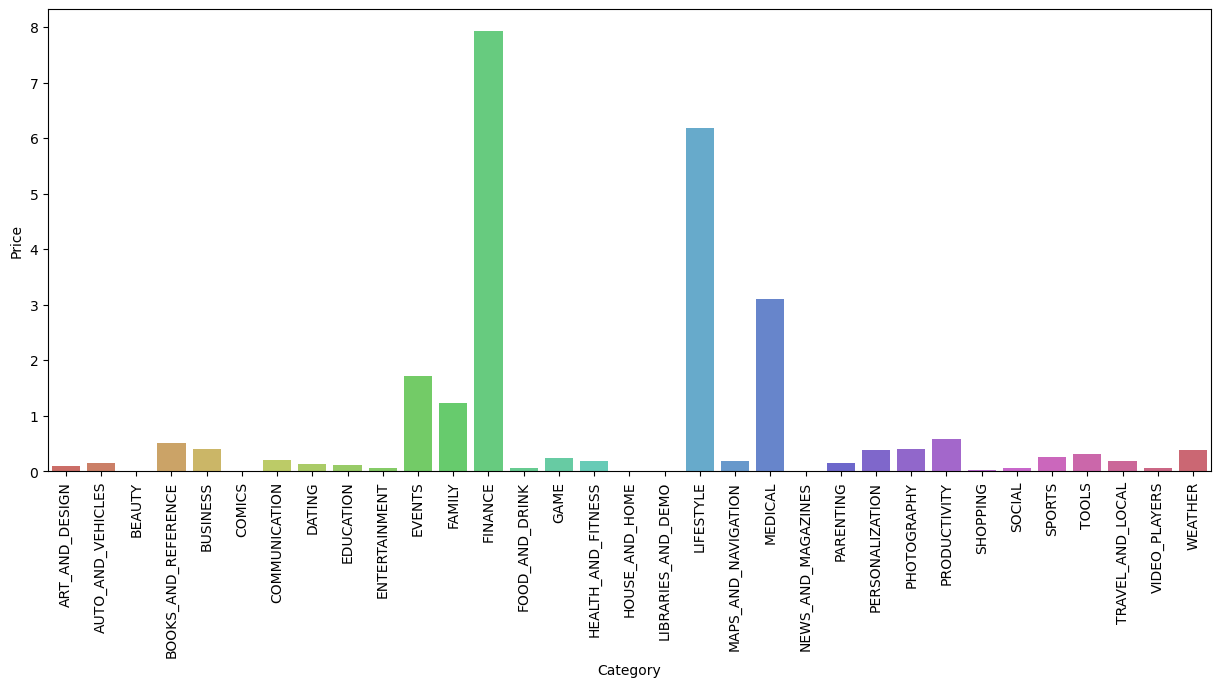

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:], y ='Price',data = category,palette='hls')
plt.xticks(rotation=90)
plt.show()

Finance, lifestyle,medical,events and family have high price 

In [37]:
df2.duplicated('App')
df2=df2.drop_duplicates(subset=['App'],keep='first')

In [38]:
df2.drop('Unnamed: 0',inplace=True,axis=1)


In [39]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.
frequency=df2[['App','Installs']]
# frequency[frequency['Installs'].max()]
frequency = frequency.sort_values(by='Installs', ascending=False) 
frequency[:][:10]

,App,Installs
342,Viber Messenger,500000000
1661,Temple Run 2,500000000
3473,Dropbox,500000000
3574,Cloud Print,500000000
3476,Google Calendar,500000000
3450,Microsoft Word,500000000
3265,Gboard - the Google Keyboard,500000000
3235,Google Translate,500000000
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000
3755,Flipboard: News For Our Time,500000000


<AxesSubplot: ylabel='Category'>

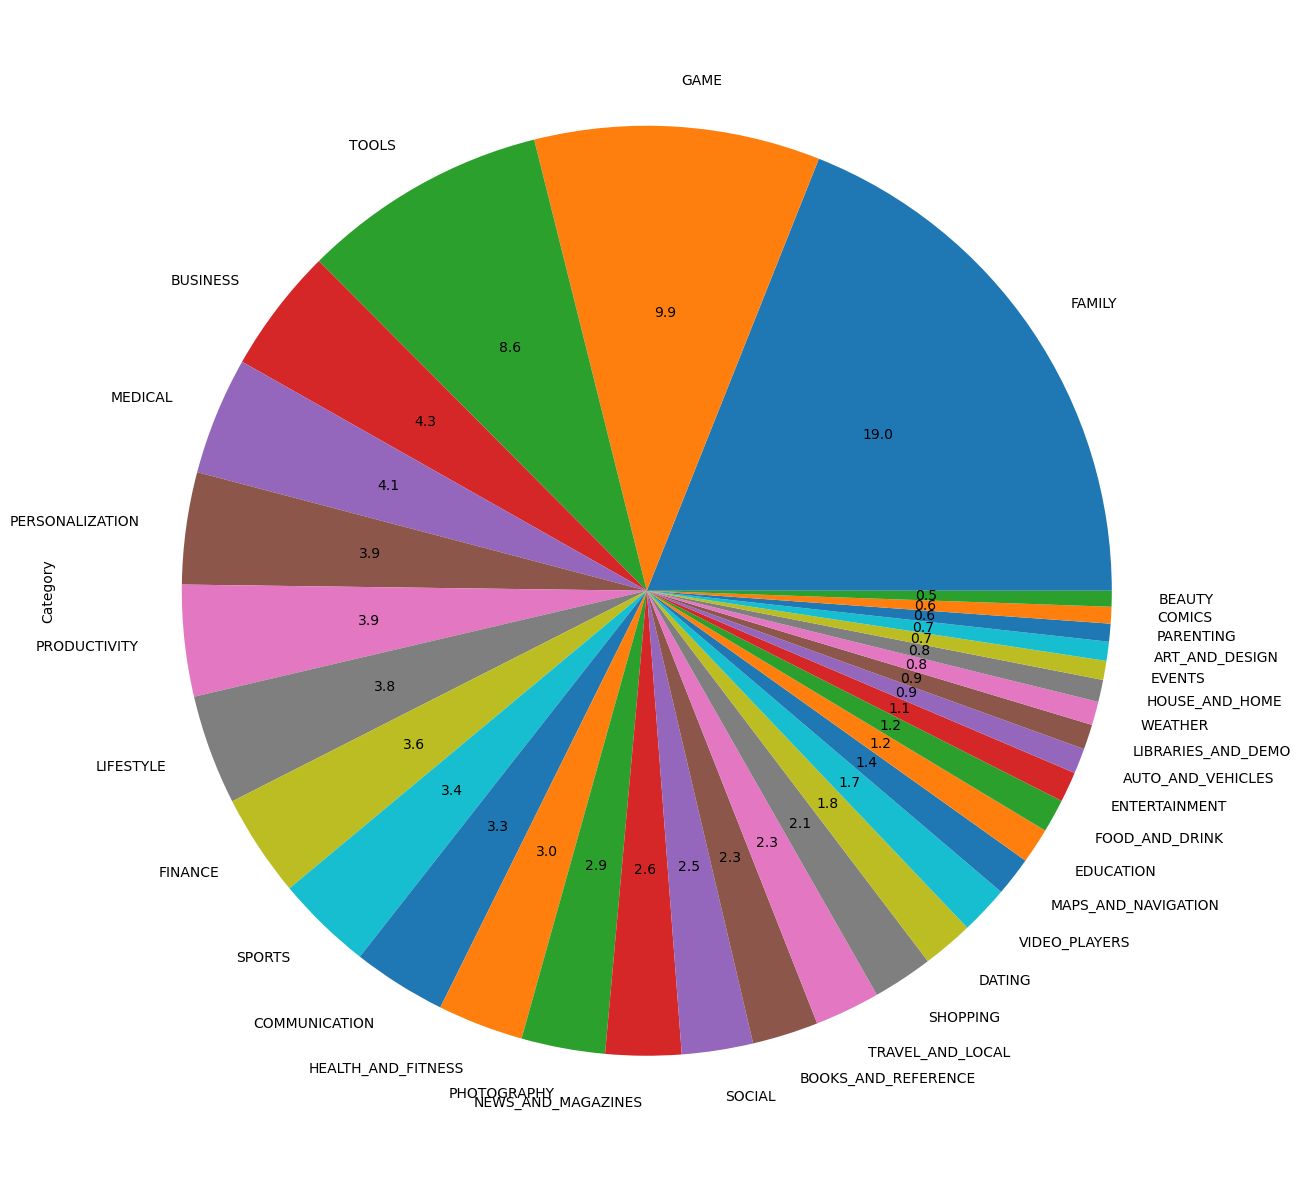

In [40]:
# Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
# Google Playstore dataset to identify the most popular app categories. How would you approach this
# task, and what features would you analyze to make recommendations to the company?

df2['Category'].value_counts().plot.pie(y=df2['Category'],figsize=(15,16),autopct='%1.1f')




1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [41]:
# Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
# most successful app developers. What features would you analyze to make recommendations to the
# company, and what data visualizations would you use to present your findings?

frequency=df2[['App','Installs']]
# frequency[frequency['Installs'].max()]
frequency = frequency.sort_values(by='Installs', ascending=False) 
print("top 10 app developer are most successful developer")
frequency[:][:10]


top 10 app developer are most successful developer


,App,Installs
342,Viber Messenger,500000000
1661,Temple Run 2,500000000
3473,Dropbox,500000000
3574,Cloud Print,500000000
3476,Google Calendar,500000000
3450,Microsoft Word,500000000
3265,Gboard - the Google Keyboard,500000000
3235,Google Translate,500000000
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",500000000
3755,Flipboard: News For Our Time,500000000


/tmp/ipykernel_84/4131970335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<AxesSubplot: >

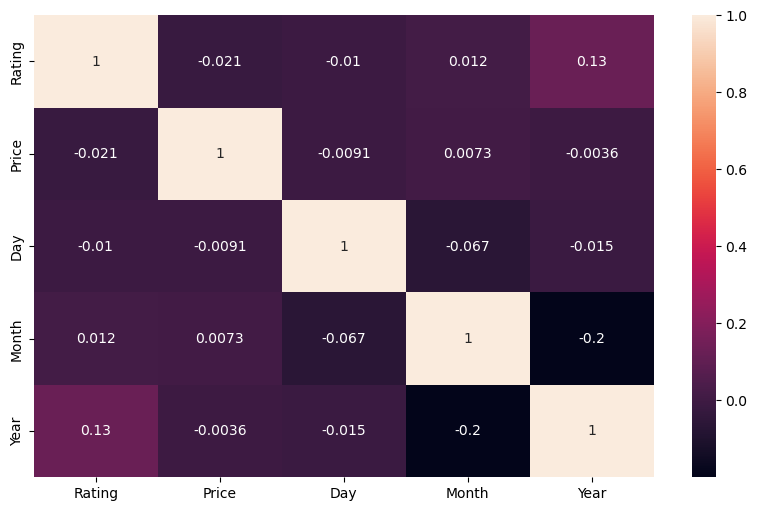

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(),annot=True)

In [43]:
df2.dropna(inplace=True)

In [44]:
# Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
# launch a new app. What features would you analyze to make recommendations to the company, and
# what data visualizations would you use to present your findings?

df2.head(2)



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


(array([ 791.,  524.,  458.,  782., 1003., 2292., 1171.,  250.,  307.,
         612.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

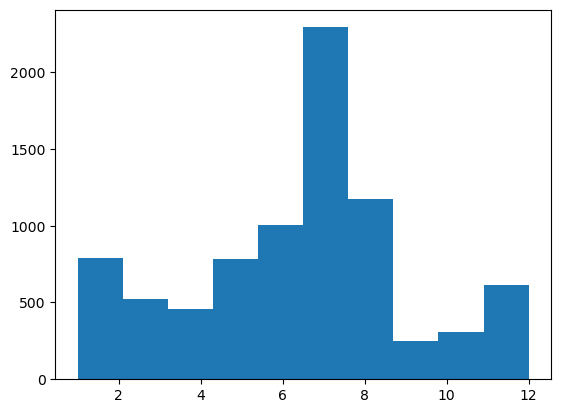

In [45]:
plt.hist(x=df2['Month'])

most of application are updated in 7th month so company can launch app in july.